## Importing libraries

In [75]:
import pandas as pd
import numpy as np
import sweetviz
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

## Loading the dataset

- I will be using the 'Heart Disease dataset' from UCI Machine Learning Repository.

In [76]:
df = pd.read_csv('processed.cleveland.data', header = None)

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- We need to add the column names for readability. The columnnames can be obtained from the heart-disease.names file found along.

In [78]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


- The description of the columns are
1. age: age in years  
2. sex: sex (1 = male; 0 = female)  
3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic  
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)  
7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest  
11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: The target variable or label

## EDA using sweetviz

- A visual report is created using sweetviz to get insights about the dataset.

In [81]:
report = sweetviz.analyze([df, 'Dataframe'])

:FEATURES DONE:                    |                     | [  0%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [82]:
report.show_html('EDA_report.html')

## Missing data

- It was found from the report that the dataset does not have any NaNs.
- It is further verified below.

In [83]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- We saw above that the features ca and thal we object dtypes whereas all the other features were float and the target variable was int.

In [84]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

- Checking for any missing values in ca and thal.
- We found from the report that there are ? entries in ca and thal.

In [85]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [86]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

- The ? represent missing data in these features. 

In [87]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


- We see that the missing values constitute only 6 entries out of 303 entries. that is 2% of the entire data.
- Since 297 entries are more than enough for a classification tree, I will drop the rows having missing values.

In [88]:
df.drop((df.loc[df.ca == '?'].index) | df.loc[df.thal == '?'].index, axis = 0, inplace = True)

In [89]:
df.shape

(297, 14)

In [90]:
df.ca.value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [91]:
df.thal.value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

- We can see that the dataset is clear of missing values. 

## Encoding categorical variables

- I will be using one-hot encoding to convert the categorical varibles.

In [92]:
df.sex.value_counts()

1.0    201
0.0     96
Name: sex, dtype: int64

In [93]:
df.cp.value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

In [94]:
df = pd.get_dummies(df, columns = ['cp', 'restecg', 'slope', 'thal'])

In [95]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [96]:
df.num.unique()

array([0, 2, 1, 3, 4])

- We are simply classifying if a person has heart disease or not.
- So we can convert all the values above 0 in the target variable to 1 which denotes they have heart disease.

In [97]:
heart_dis_index = df.loc[df.num > 0].index

In [98]:
heart_dis_index

Int64Index([  1,   2,   6,   8,   9,  12,  16,  22,  23,  24,
            ...
            290, 292, 293, 294, 296, 297, 298, 299, 300, 301],
           dtype='int64', length=137)

In [99]:
df.loc[heart_dis_index, 'num'] = 1

In [100]:
df.num.unique()

array([0, 1])

## Building a preliminary classification tree

In [101]:
x = df.drop(columns = 'num', axis = 1)

In [102]:
y = df.num

In [103]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state = 42)
classifier = DecisionTreeClassifier(random_state = 42)
classifier = classifier.fit(x_train, y_train)

- We can plot the trained classification tree as shown below

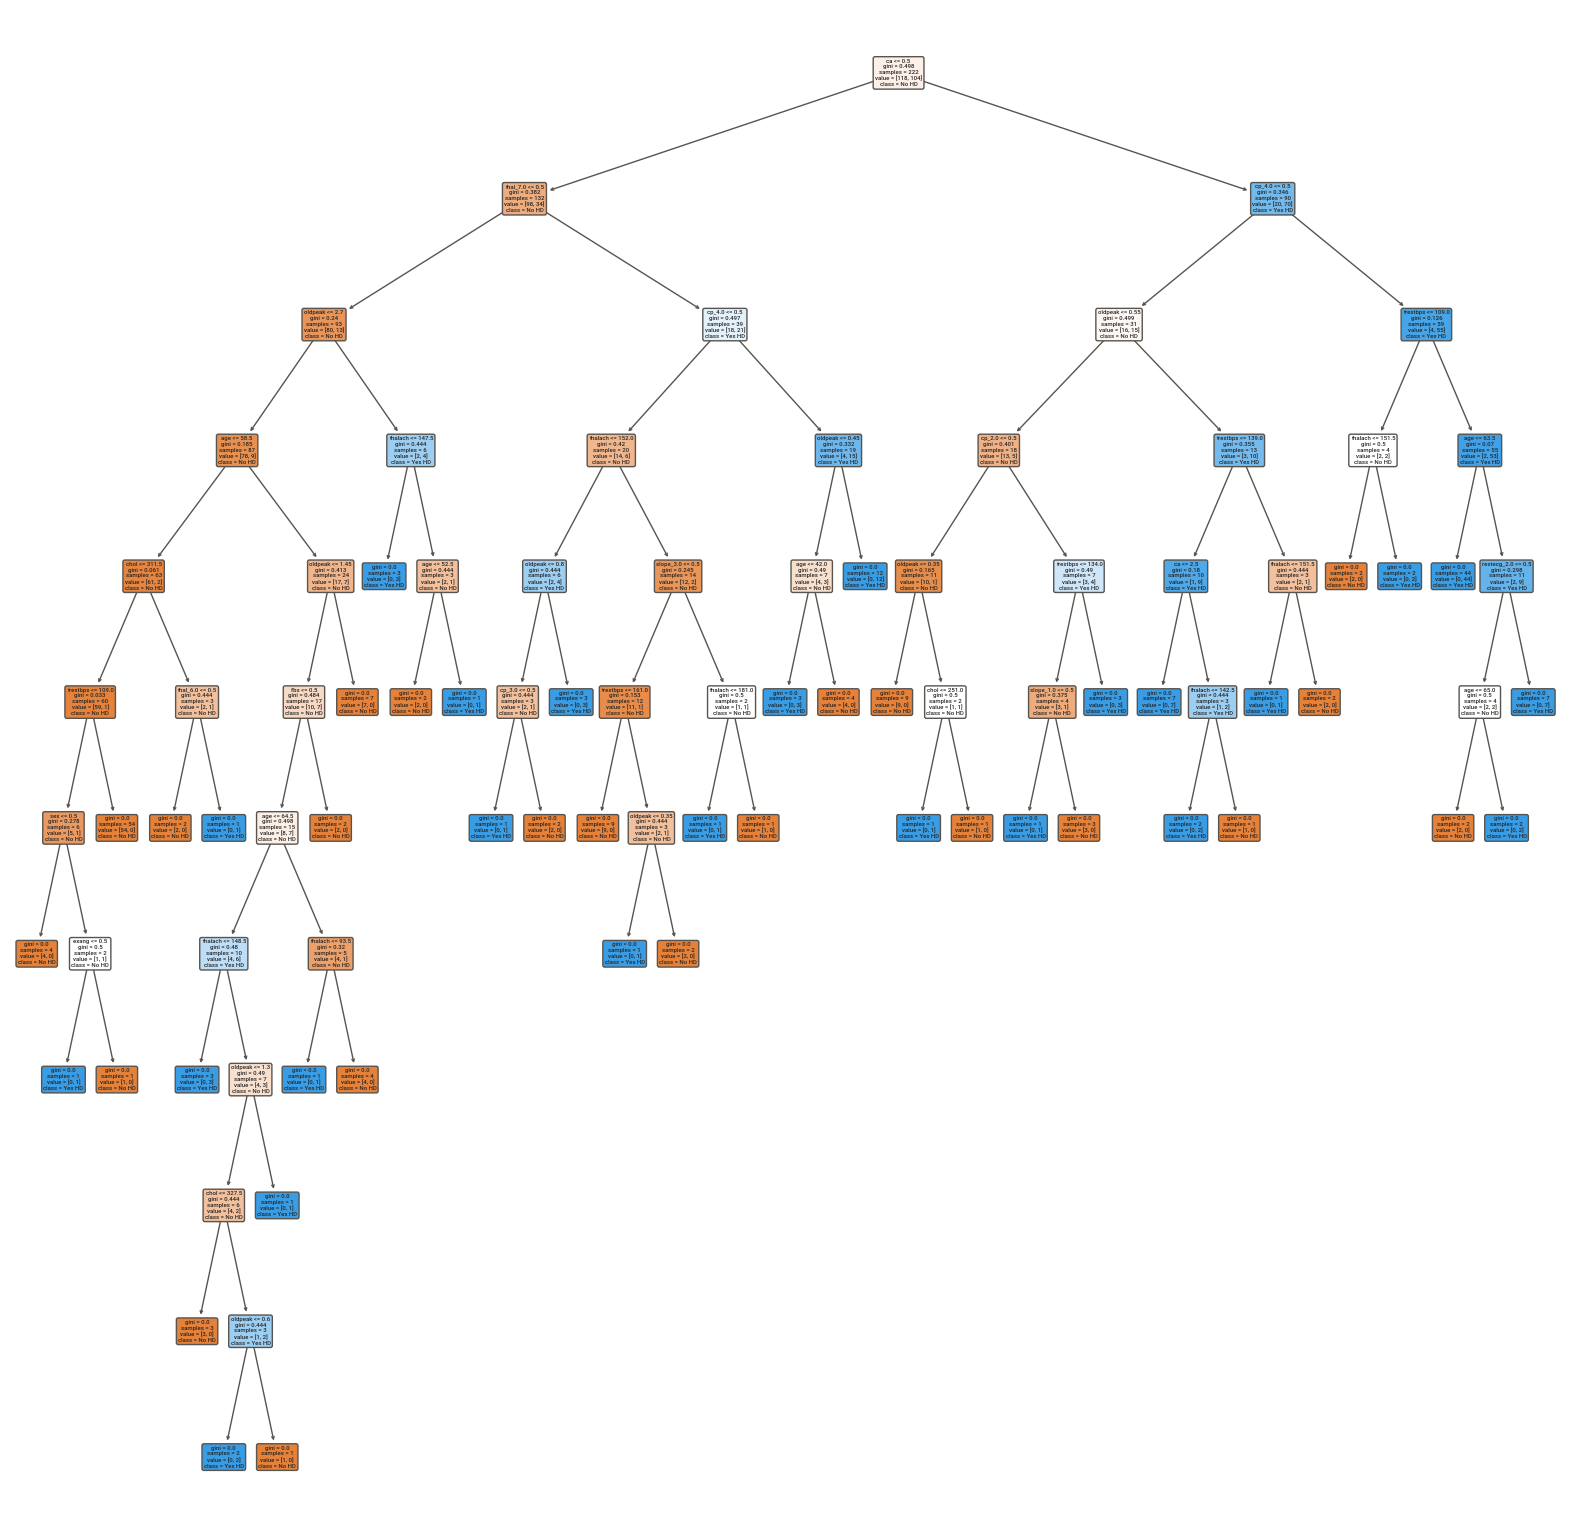

In [104]:
fig = plt.figure(figsize = (20,20))
plot_tree(classifier, 
          filled = True, 
          rounded = True, 
          class_names = ['No HD', 'Yes HD'],
          feature_names = x.columns)
plt.show()

- Now to check how our tree model works on the testing data, we could plot the confusion matrix

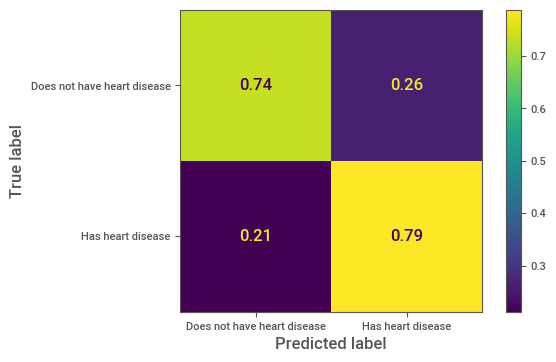

In [105]:
plot_confusion_matrix(classifier, x_test, y_test, display_labels = ['Does not have heart disease', 'Has heart disease'], normalize = 'true')

We can infer from the matrix
- 74% of the people not having HD was classified correctly.
- 79% of the people having HD was classified correclty.

- We may have overfit the tree.
- We can consider pruning the tree to get better results by avoiding overfitting the training data.

I will be using the inbuilt cost-complexity pruning technique to prune the decision tree.

In [106]:
path = classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

- We have removed the maximum alpha value from the list of alphas so as to avoid the tree having only one-leaf, the root-node as its single leaf.

In [107]:
classifiers = []
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    classifier.fit(x_train, y_train)
    classifiers.append(classifier)

In [108]:
train_scores = [classifier.score(x_train, y_train) for classifier in classifiers]
test_scores = [classifier.score(x_test, y_test) for classifier in classifiers]

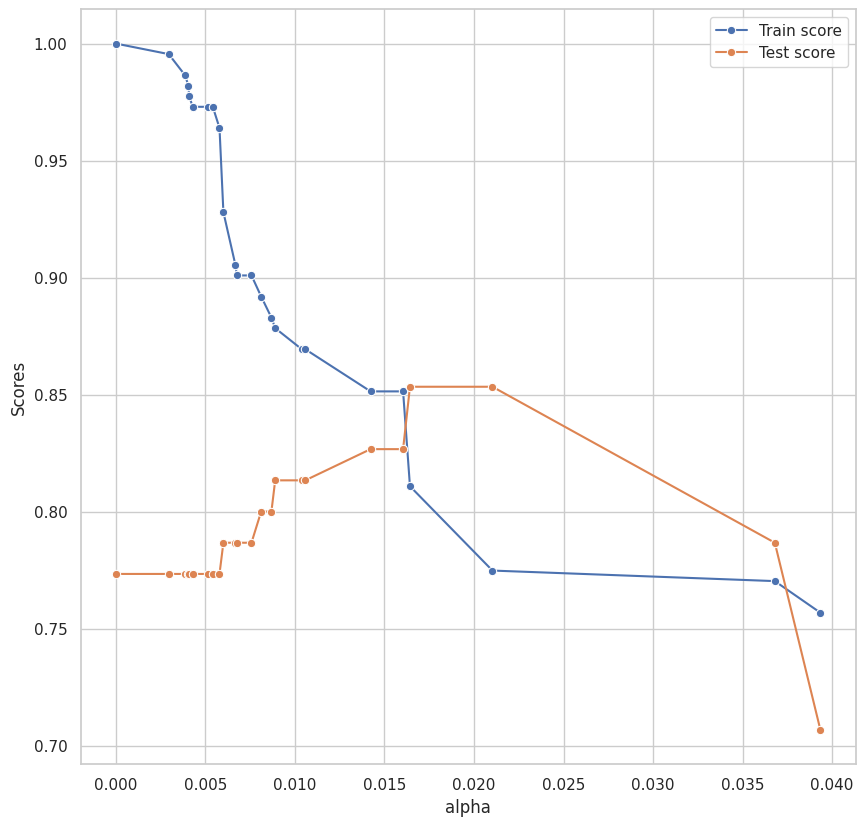

In [109]:
sns.set(style = 'whitegrid')
fig = plt.figure(figsize = (10,10))
ax = sns.lineplot(x = ccp_alphas, y = train_scores, label = 'Train score', marker = 'o')
ax = sns.lineplot(x = ccp_alphas, y = test_scores, label = 'Test score', marker = 'o')
plt.xlabel('alpha')
plt.ylabel('Scores')
plt.show()

- We can see that the best value of alpha would be 0.016.

### Using cross-validation to find the best value of alpha

- In the above method we only used a single training and test data selections to get the value of alpha.
- It is better to use a 10-fold cross validation to find the value of alpha as it is include the usage of various training and testing data selections.

In [110]:
classifier = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)

In [111]:
cv_scores = model_selection.cross_val_score(classifier, x_train, y_train, cv = 5)

In [112]:
df_score = pd.DataFrame(data = {'tree' : range(5), 'accuracy' : cv_scores})

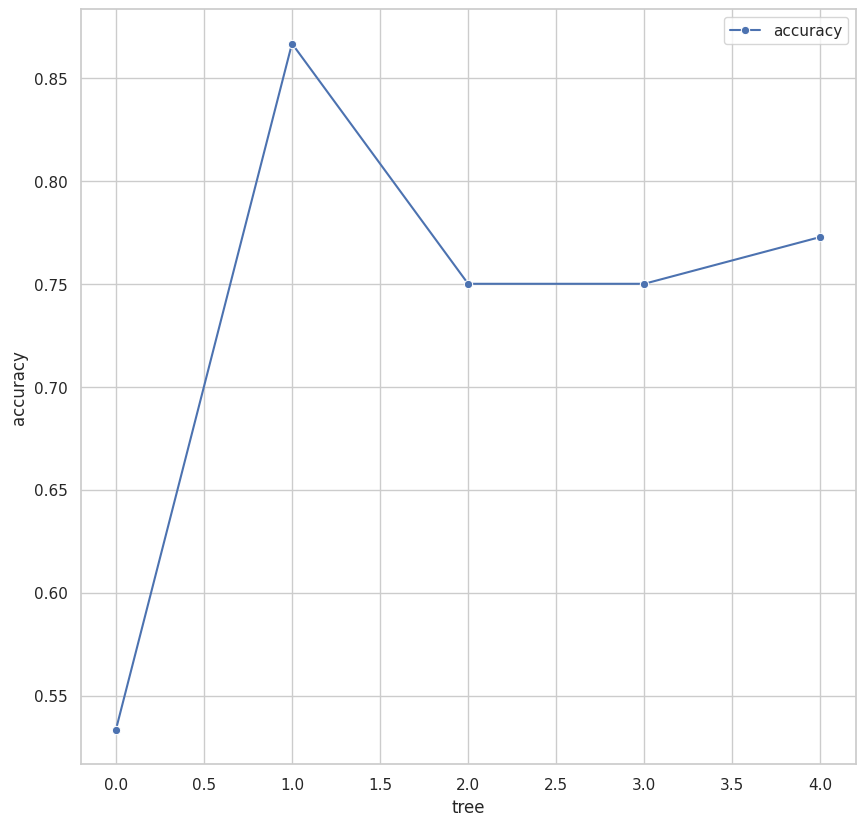

In [113]:
fig = plt.figure(figsize = (10,10))
ax = sns.lineplot(x = 'tree', y = 'accuracy', data = df_score, marker = 'o', label = 'accuracy')

- From the above plot we can see that, while using different training and testing data on the model having alpha = 0.016, the accuracies are different.
- So it is evident that we use cross-validation to get the value of alpha instead of arriving at it from a single training and testing  data as before.

In [114]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    cv_scores = model_selection.cross_val_score(classifier, x_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(cv_scores), np.std(cv_scores)])

In [115]:
df_alpha = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_score', 'std'])

In [116]:
df_alpha

,alpha,mean_score,std
0,0.000000,0.675556,0.099330
1,0.002953,0.675556,0.099330
2,0.003861,0.680000,0.093173
3,0.004054,0.680000,0.093173
4,0.004095,0.680000,0.093173
5,0.004294,0.680000,0.093173
6,0.005148,0.680000,0.093173
7,0.005413,0.702626,0.103065
8,0.005788,0.716263,0.103916
9,0.006006,0.716263,0.103916


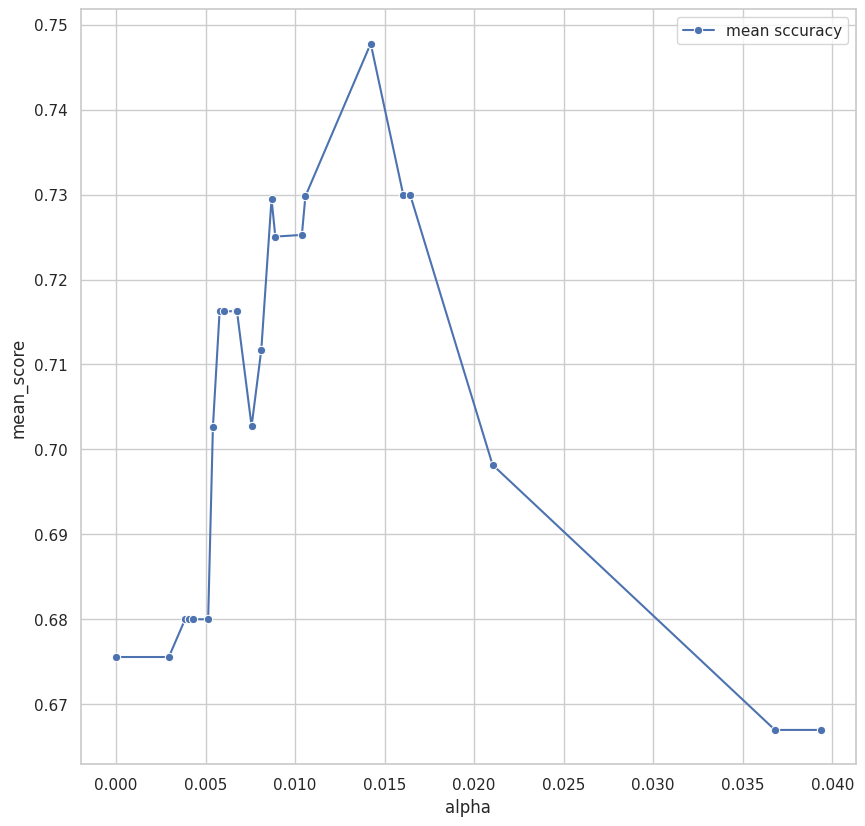

In [117]:
fig = plt.figure(figsize = (10,10))
ax = sns.lineplot(x = 'alpha', y = 'mean_score', data = df_alpha, marker = 'o', label = 'mean sccuracy')

- We need to get the value of alpha for which the mean score is maximum. 
- From the plot we can see that is it around 0.014.

In [118]:
best_alpha = df_alpha.loc[df_alpha.mean_score == df_alpha.mean_score.max()].alpha.values[0]

In [119]:
best_alpha

0.014224751066856332

- Now that we have got the best value of alpha, we can model the final classification tree.

## Building the pruned classfication tree

In [120]:
classifier_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = best_alpha)
classifier_pruned = classifier_pruned.fit(x_train, y_train)
accuracy = classifier_pruned.score(x_test, y_test)
print(accuracy)

0.8266666666666667


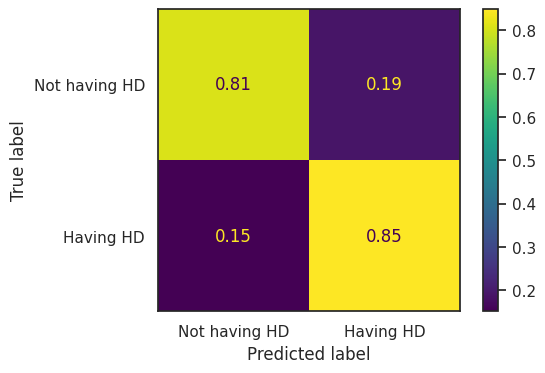

In [121]:
sns.set(style = 'white')
plot_confusion_matrix(classifier_pruned, x_test, y_test, display_labels = ['Not having HD', 'Having HD'], normalize = 'true')

- 81% of the patients not having HD was classified correctly. It was 74% previously.
- 85% of the patients having HD was classified correctly. It was 79% previously.

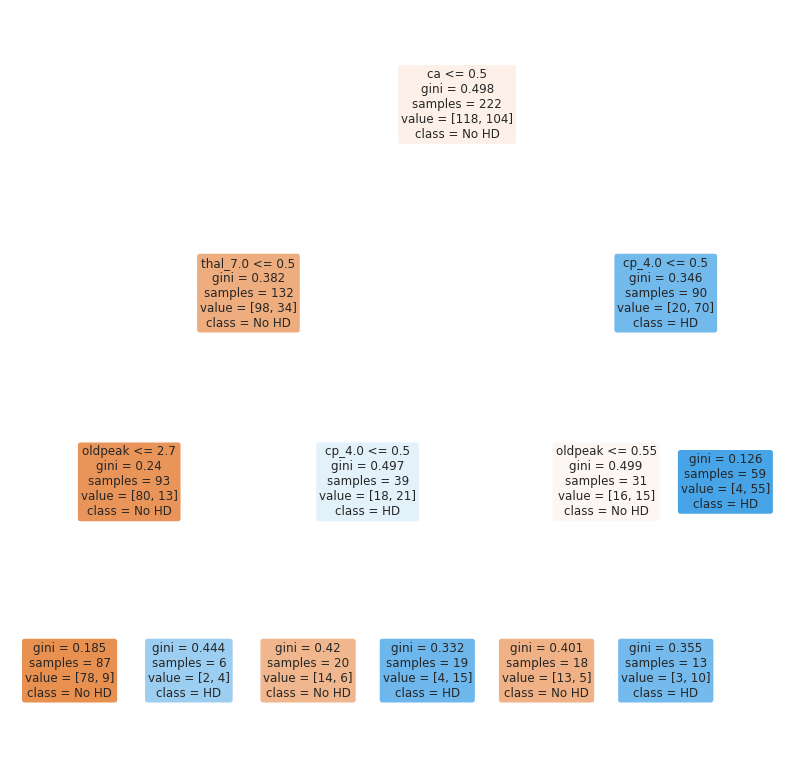

In [122]:
fig = plt.figure(figsize = (10,10))
plot_tree(classifier_pruned, filled = True, rounded = True, class_names = ['No HD', 'HD'], feature_names = x.columns)
plt.show()

## Using Nested CV for hyperparameter tuning and model evaluation

- I will be using Nested Cross Validation to perform the tuning of hyperparamters and evaluation of model in one go.

In [191]:
inner_cv = model_selection.GridSearchCV(estimator = DecisionTreeClassifier(), 
                                        param_grid = {'ccp_alpha' : ccp_alphas}, 
                                        cv = 5)

In [192]:
inner_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])})

In [193]:
inner_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.014224751066856332)

In [194]:
inner_cv.best_score_

0.7523232323232323

- From the inner loop of nested CV I could find that the best value for alpha is 0.0142

In [199]:
outer_cv = model_selection.cross_val_score(inner_cv, x, y, cv = 5)

In [200]:
outer_cv

array([0.73333333, 0.9       , 0.79661017, 0.66101695, 0.77966102])

In [201]:
mean_accuracy = np.mean(outer_cv)
print(mean_accuracy)

0.7741242937853108
